# Instructions for using TabPy for Tableau

If you are like me and enjoy using Python as a programming language for data science purposes, but wish you could integrate your models with a Visual tool like Tableau - then this is the guide for you. 

The answer to that particular case would be using TabPy, an external service app which can expand Tableau to use Python scripts. Ultimately this allows you to make Calculated Fields in Tableau that import Python scripting language.

Pairing both together allows you to build advanced-analytics that can aid in various business use cases by combining Python Machine-Learning and making your Tableau dashboards even better! Additionally if you are better at Python, but work with clients, BI teams, etc. with a heavier Tableau focus, you will able to complete more complex logic than Tableau is capable of and boost your potential insights in the process.

Some use cases in which you might use this functionality include:

* Pre-Processing and Data Cleaning
* Building Re-usable Predictive Models
* Lead Scoring
* Sentiment Analysis
* Customer Churn Prediction

### TABLE OF CONTENTS

1. [Requirements](#1)
1. [Example 1 - Pearsons Correlation](#2)
1. [Example 2 - Churn Prediction](#3)
1. [Final Model and Deploy](#4)
1. [Loading Model into Tableau Desktop](#5)
1. [Loading Model into Tableau Prep](#6)


### What is Python

"A high-level, interpreted, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation. Python is dynamically-typed and garbage-collected. It supports multiple programming paradigms, including structured, object-oriented and functional programming." - [Link](https://en.wikipedia.org/wiki/Python_(programming_language) [Learn more here](https://www.python.org/)

### What is Tabpy

"TabPy (the Tableau Python Server) is an Analytics Extension implementation that expands Tableau’s capabilities by allowing users to execute Python scripts and saved functions via Tableau’s table calculations." - [Link](https://www.tableau.com/developer/tools/python-integration-tabpy) [Learn more here](https://github.com/tableau/TabPy)

<a id='1'></a>  
### REQUIREMENTS

#### Step 1 - Installing Python

The Anaconda and Juptyer Way (preferred, easiest method which also comes with Python) **Note: Must be Python 3.7 or greater**
1. Go to this [link](https://www.anaconda.com/) and download the right version for your system
2. Install Anaconda to your chosen directory

#### Step 2 - Install Additional Python Dependencies

1. Open Anaconda Navigator
2. In the grid menu, click Launch under '**CMD.exe Prompt**'
3. First make sure you have pip installed with Python, by typing '**python -m pip install --upgrade pip**'
4. Next, install the following:
    - '**pip install pycaret**'
    - '**pip install xgboost**'
5. Close the terminal
6. Close Anaconda Navigator

#### Step 3 - Installing TabPy

1. Open Anaconda Navigator again
2. In the grid menu, click Launch under '**CMD.exe Prompt**' again
3. Next simply type in '**pip install tabpy**' and '**pip install tabpy_client**'
    - Alternatively use:
        - conda install -c anaconda tabpy-server
        - conda install -c anaconda tabpy-client
4. Once installed, now type in '**tabpy**' to start a locally hosted tabpy server
5. Leave this powershell window open while you work

#### Step 4 - Tableau Desktop

**Note: Does not work with Tableau Public**

1. Go to this [link](https://www.tableau.com/products/desktop) and download the right version for your system
2. If you have it already, make sure you have the latest version

#### Step 5 - (OPTIONAL) Tableau Prep

**Provides a visual interface for data flow, the optional section further below will explain when you may want to this depending on your use case**

1. Go to this [link](https://www.tableau.com/products/prep) and download the right version for your system
2. If you have it already, make sure you have the latest version

#### Step 6 - Connecting to TabPy in Tableau

1. Open Tableau Desktop
2. Go to Help on the top bar menu
3. Hover your mouse over '**Settings and Performance**'
4. In the sub-menu, click on '**Manage Analytics Extension Connection**'
5. In the pop-up window, click on '**TabPy**'
6. For the hostname type type-in '**localhost**'
7. In the port type-in '**9004**'
8. Click on '**Test Connection**' (If it says 'Successfully connected to the analytics extension like in the image, you are good to go')

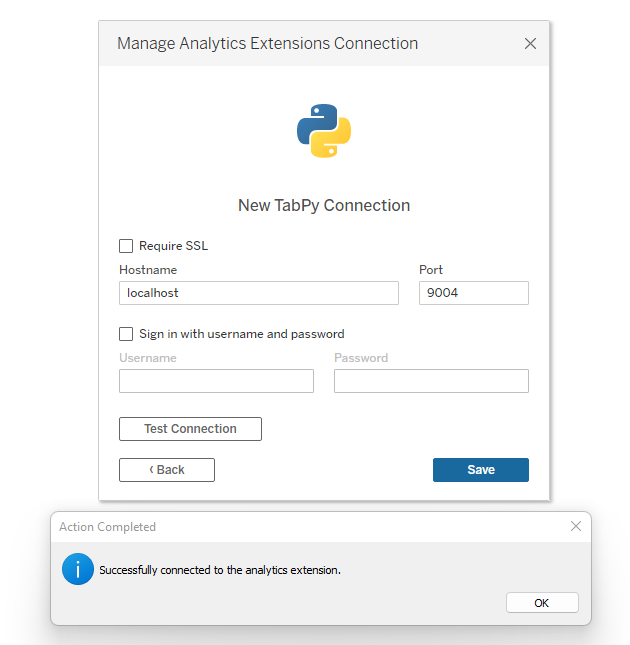

<a id='2'></a> 
# Pearsons Correlation Coefficient (Example 1)

Many thanks to Toan Hoang for the original instructions that this is derived from which you can go to by clicking [here](https://tableau.toanhoang.com/tableau-and-python-an-introduction/).

We can work on a quick example by using the 'Sample Superstore' data source in Tableau Desktop and create an example calculated field with Python script. You will be using corrcoef from the numpy library in python.

The example created Pearson's Correlation Coefficient to investigate the relationship between two quantitative/continuous values. Pearson's measures the strength of the association between those two values.

1. Click on '**Superstore**' in Tableau Desktop
2. Create a new worksheet by clicking on '**New Worksheet**' or use '**Ctrl+M**'
3. Make sure you are in the '**Sample - Superstore**' Data source on the upper left-hand side
4. Click on the small down arrow next to the search area, above the Tables, and click on '**Create Calculated Field**'
5. Rename the Calculation Pearsons Correlation Coefficient and type in the following:

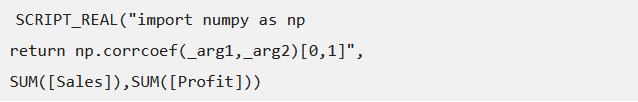

What this is doing:

* Importing the **NumPy Library**
* Returning and calling **corrcoef** on np, and passing in two **argument variables** (Sales, Profit)

Build the worksheet:

* Change **Mark Type** to **Circle**
* Drag Product -> **Category** onto **Columns**
* Drag **Sales** onto **Columns**
* Drag **Profit** onto **Rows**
* Drag **Customer Name** onto the **Detail Mark**

It will look like this:

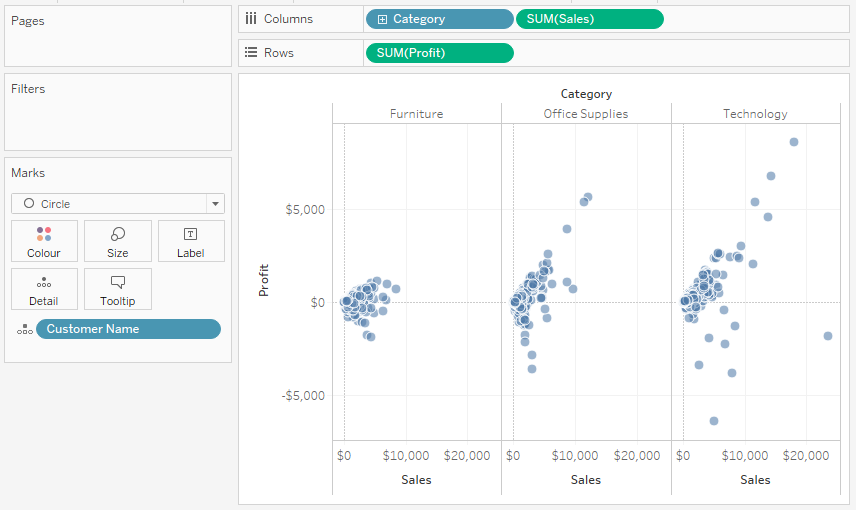

Applying the Pearson Correlation Coefficient:

* Drag **Pearson Correlation Coefficient** onto the **Colour Mark**
* Right-click on Pearson Calculation in the Marks menu, and go to **Compute Using** and select **Customer Name**
* Click on the **Color Mark** square
* Click on **Edit Colors**
* click on the **Palette Dropdown** menu and select **Red-Green Diverging** and click Apply and Ok

What you should be seeing is the following:

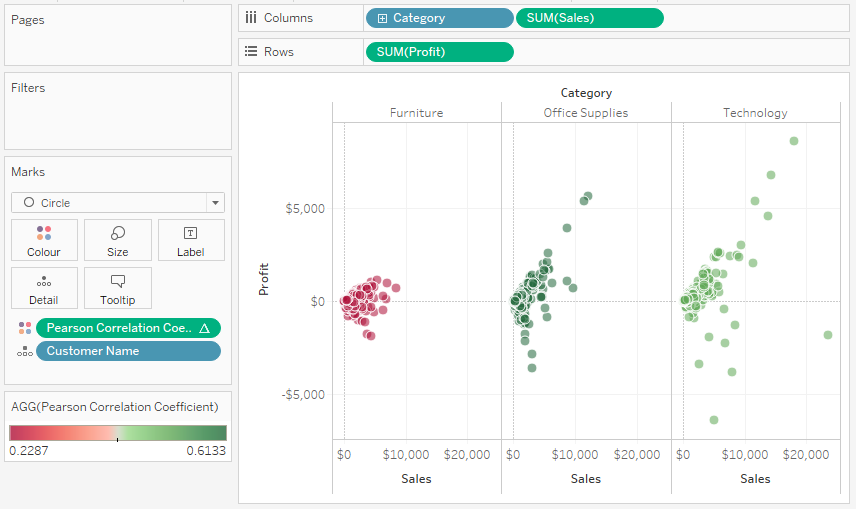

This simply means that the 'redder' a category is, the less strength between those items sold in a category have when comparing Sales and Profit. So the greatest strength appears to be with Office Supplies (stronger profit ratio).

Another way of thinking about it these findings is the 'best fit' each category has:

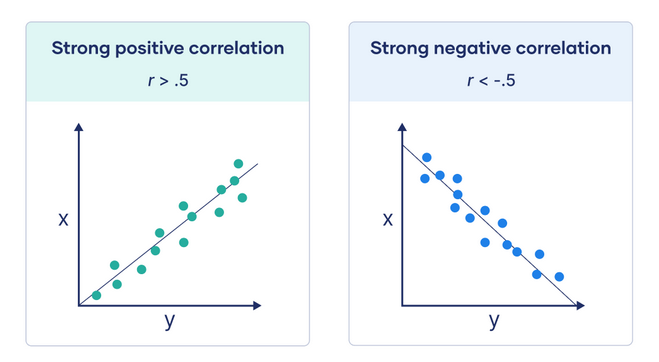

While there appears to be no negative correlation, the other two categories have 'weak' positive correlation in comparison to Office Supplies.

<a id='3'></a> 
# Churn Prediction Modeling (Example 2)

In this next example we will use Maven Analytics's telecom_customer_churn data source ([Download Here](https://maven-datasets.s3.amazonaws.com/Telecom+Customer+Churn/Telecom+Customer+Churn.zip)) to build a model to predict which features of the dataset, using an XGBoost Classifier, are the mostly likely for churn (i.e., users likely to cancel their service). And from there working that model into a TabPy script. To learn more about what XGBoost is you can read about it [here](https://www.nvidia.com/en-us/glossary/data-science/xgboost/).

Ideally you want to test multiple types of models to compare which is the most accurate, but we will only be focusing on one.

## Section 1
## Telecom Customer Churn Data - Feature Importance

This dataset was created for a Maven Analytic's challenge freely available to the community. It contains data on customers for a fictional telecom company that has been neatlly organized across 37 features and contains 7500 records listing the current status of individual customers.

If you wish to skip directy to the model building you can, however it is important to determine which features we can remove when building the model later.

#### Step 1 - Imports

In [1]:
#imports
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, confusion_matrix, classification_report, accuracy_score
from xgboost import XGBClassifier
from pycaret.classification import *
import pickle
import tabpy_client

#### Step 2 - Explore the Data

By looking at the dataframe, columns, and datatypes we can determine what will need to be transformed and/or pre-processed. Many of the columns include Yes or No, or have no value at all. In order for a machine learning model to work with this particular dataset you will need to take additional steps, which I will show below, that will accomplish the task of making it work with a machine learning methods.

The final transforming will include:

* replacing spaces in column names with _
* lower case all column names for ease of use
* create a new churn column with only two values (0, 1 - i.e. No, and Yes)
* replace all categories that have No and Yes to 0 and 1's
* fill null values in 'internet_type'
* fill rest of null rows with 0s
* dropping unneeded columns

In [4]:
#Take a first look at the data to get an idea of what will need to be modified
# for later use
df = pd.read_csv('telecom_customer_churn.csv')
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


#### Step 3 - Clean the Data

Before we begin building a model, first we are going to work within a dataframe that will find the  positive and negative correlation feature importances.

In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df_new = df
categorical = ['gender','married','offer','phone_service','multiple_lines',
               'internet_service','internet_type','online_security','online_backup',
               'device_protection_plan','premium_tech_support','streaming_tv','streaming_movies',
               'streaming_music','unlimited_data','contract','paperless_billing','payment_method',
               'customer_status']
numerical = ['age','number_of_dependents','number_of_referrals','tenure_in_months',
             'avg_monthly_long_distance_charges','avg_monthly_gb_download','monthly_charge',
            'total_charges','total_refunds','total_extra_data_charges','total_long_distance_charges',
            'total_revenue']

#combine categorical and numerical columns and create new dataframe
reading_data = df_new[categorical+numerical]

#get_dummies creates one-hot coding for the categorical columns
#what this does is for each column, a 1 is used to designate that the category exists for
#the current row, or otherwise 0

df_dummies = pd.get_dummies(reading_data)
df_dummies.columns = df_dummies.columns.str.lower().str.replace(' ', '_')
df_dummies.fillna(0, inplace=True)

#### Step 4 - Graph the Feature Importances

This code originates from Kaggle and is highly re-usable. Many thanks to the original creator which you can find [here](https://www.kaggle.com/code/vineetpdabholkar/churn-predictor-smote-enn-with-powerbi-dashboard)

Text(0.5, 1.0, 'Positive Correlation')

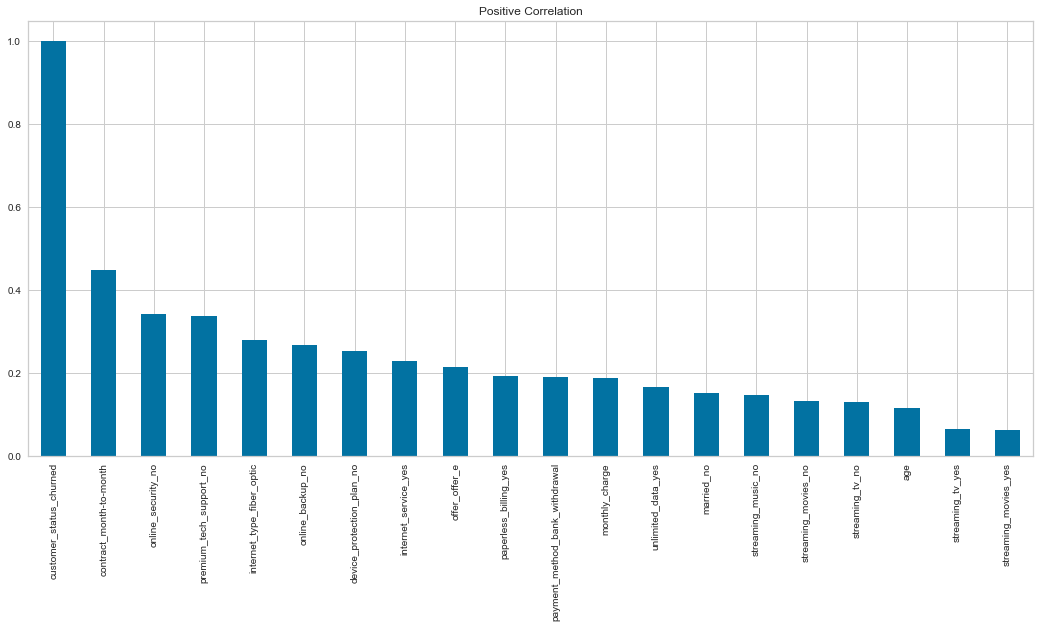

In [13]:
#now we plot a correlation graph for positive and negative feature importances
#there are other ways to show feature importances, which I explain further on

plt.figure(figsize=(18,8))
df_dummies.corr()['customer_status_churned'].sort_values(ascending = False)[:20].plot(kind='bar')
plt.title('Positive Correlation')

Text(0.5, 1.0, 'Negative Correlation')

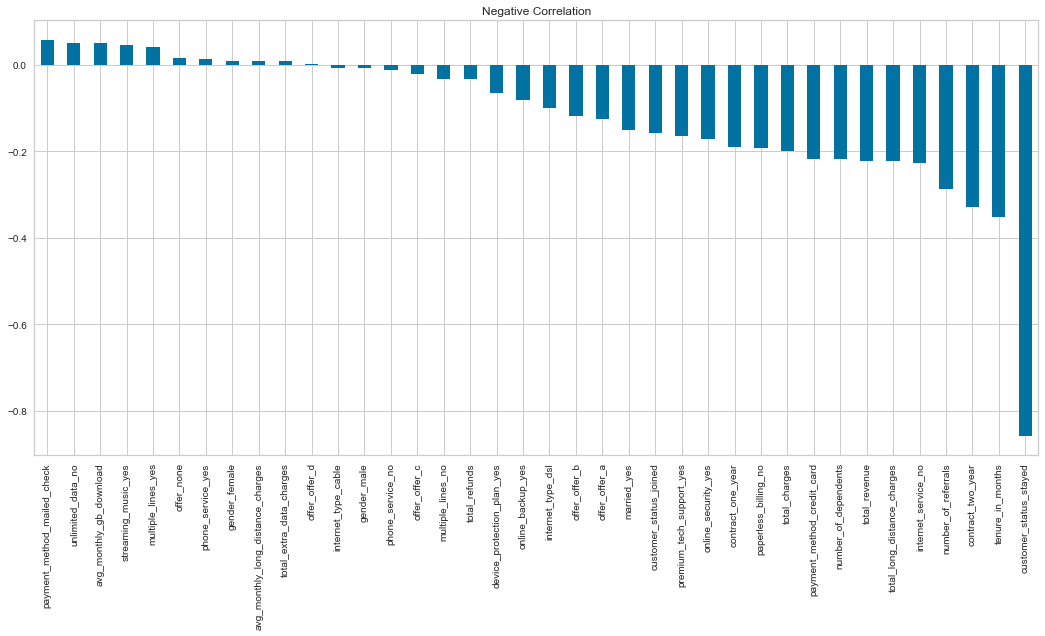

In [14]:
plt.figure(figsize=(18,8))
df_dummies.corr()['customer_status_churned'].sort_values(ascending = False)[20:].plot(kind='bar')
plt.title('Negative Correlation')

<AxesSubplot:>

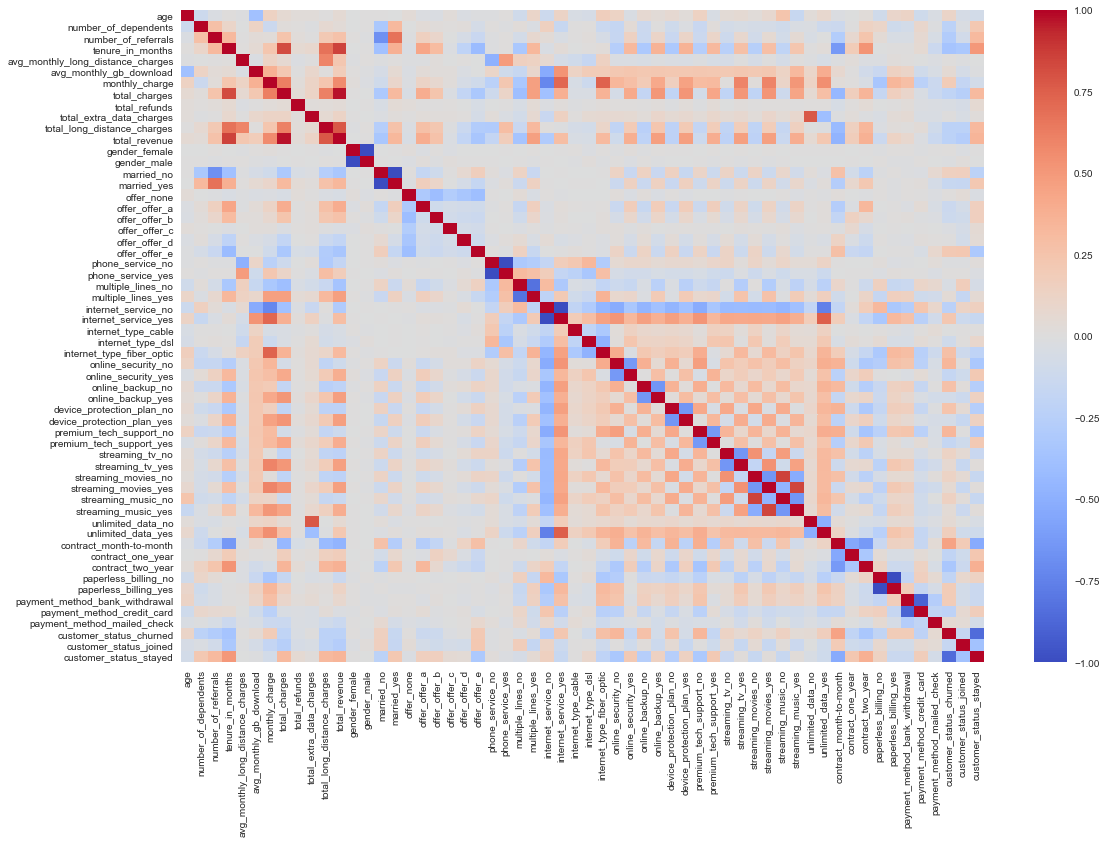

In [15]:
#Let's look at it as a heat map
#This can be quite a lot to look at due to number of features in this dataset

plt.figure(figsize=(18,12))
sns.heatmap(df_dummies.corr(),cmap='coolwarm')

In [16]:
#you can also take a look at the first 5 churning customers

churners_df = df_new.loc[df_dummies['customer_status_churned']==1]
non_churners_df = df_new.loc[df_dummies['customer_status_churned']==0]
churners_df.head()

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.0,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.0,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.0,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
18,0022-TCJCI,Male,79,No,0,Daly City,94015,37.680844,-122.481310,0,45,None,Yes,10.67,No,Yes,DSL,17.0,Yes,No,Yes,No,No,Yes,No,Yes,One Year,No,Credit Card,62.7,2791.50,0.0,0,480.15,3271.65,Churned,Dissatisfaction,Limited range of services
19,0023-HGHWL,Male,67,No,0,Morgan Hill,95037,37.161544,-121.649371,0,1,None,No,NaN,NaN,Yes,Cable,9.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,25.1,25.10,0.0,0,0.00,25.10,Churned,Competitor,Competitor made better offer


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


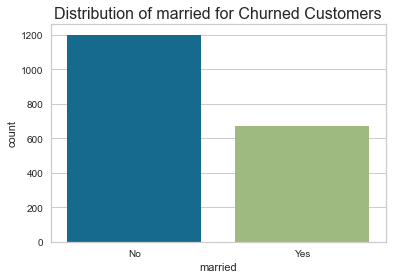

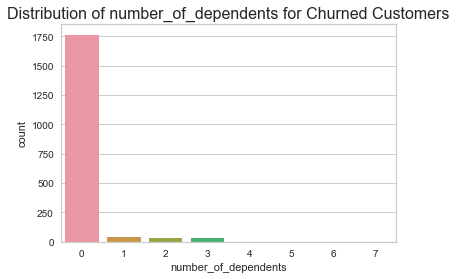

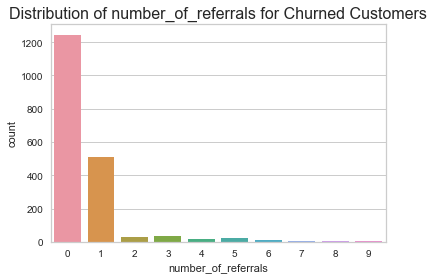

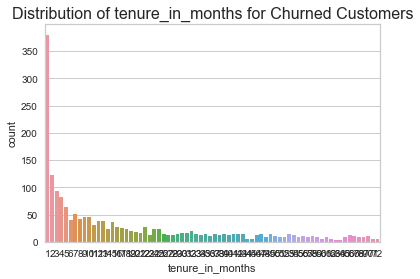

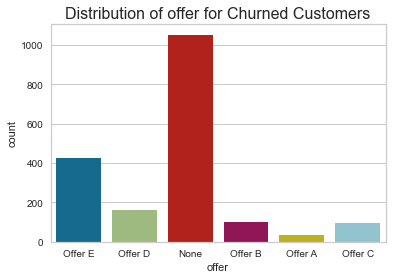

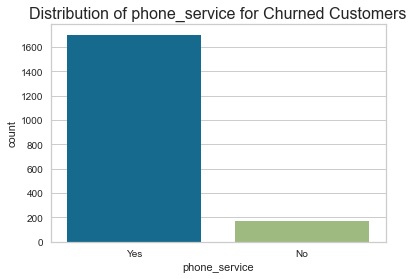

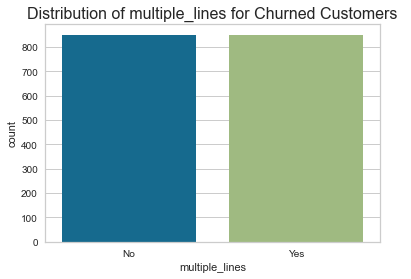

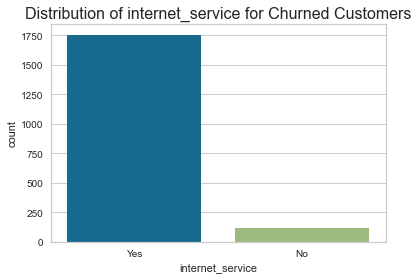

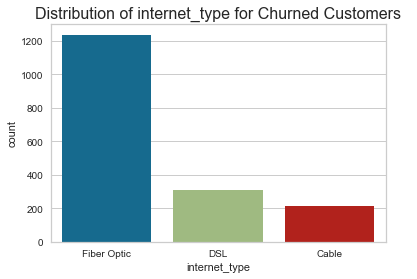

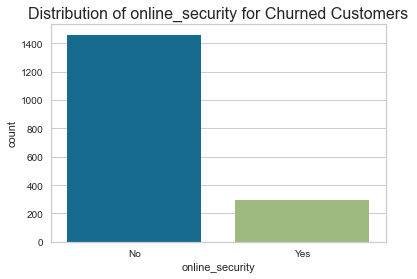

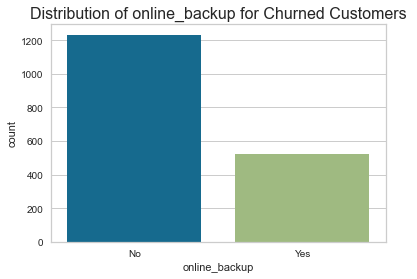

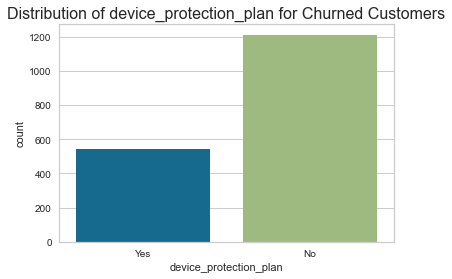

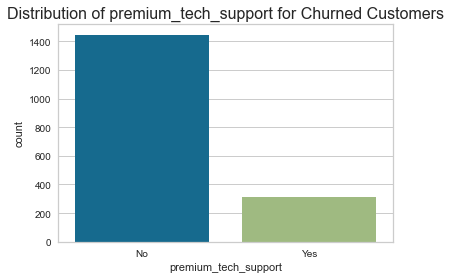

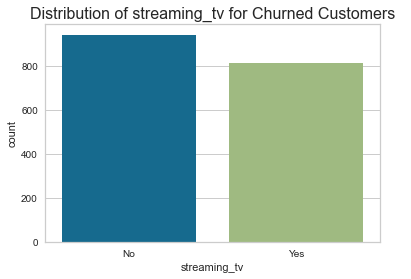

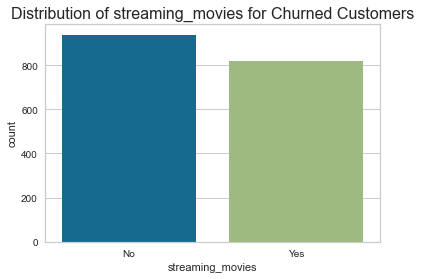

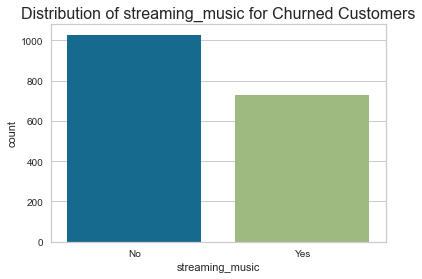

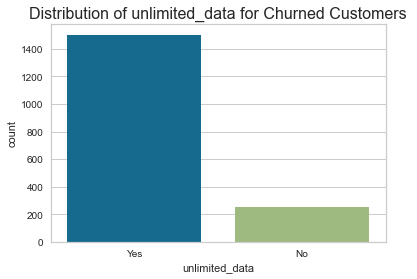

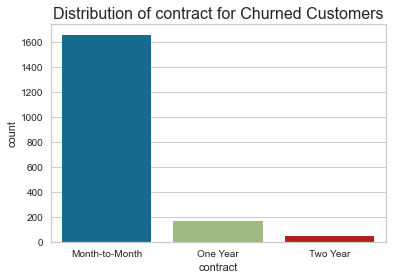

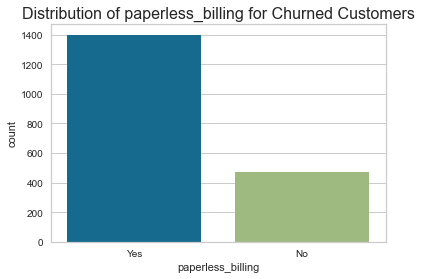

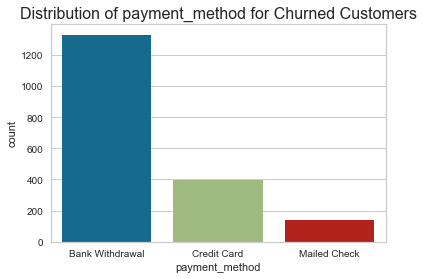

In [17]:
#An alternative to finding feature importances before building a model
#can be made by enumrating each feature and giving its own graph
#for each to compare against churned

#I have removed several features that were determined not to be as significant

for i, predictor in enumerate(churners_df.drop(columns=['churn_reason','churn_category',
    'customer_status','city','age','total_charges','monthly_charge','gender','customer_id',
    'latitude','longitude','total_revenue','total_long_distance_charges','total_extra_data_charges',
     'total_refunds','avg_monthly_gb_download','avg_monthly_long_distance_charges','zip_code'])):
    plt.figure(i,figsize=(6,4))  
    plt.title("Distribution of {} for Churned Customers".format(predictor),fontsize='16')
    sns.countplot(data=churners_df,x=predictor)
    plt.tight_layout
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

From these graphs we can already see a few things that might be causing significant customer churn:

* High number of 0 dependents
* High number of 0 referrals
* High number of low tenure
* Many are not on any Offer plan
* Many were using Fiber Optic
* Many were on Month-to-Month
* Many were using Paperless billing and Bank Withdrawals

If you return to the positive correlation graph, you will see many of these listed.

#### Step 5 - Build Pre-Lim Predictive Model (Non Pycaret Method)

In [27]:
#make a new dataframe based off df_new from earlier
df_base = df_new
#here we will make a new 'churn' column,
#since customer status has 3 category items, we need 2
df_base.loc[df_base.customer_status=='Stayed','churn'] = 0
df_base.loc[df_base.customer_status=='Joined','churn'] = 0
df_base.loc[df_base.customer_status=='Churned','churn'] = 1
#need to drop customer_id for the model to work
df_base = df_base.drop('customer_id', axis=1)

#define the columns that will be one hot columns for getdummies
oneHotCols = ['gender','married','offer','phone_service','multiple_lines',
               'internet_service','internet_type','online_security','online_backup',
               'device_protection_plan','premium_tech_support','streaming_tv','streaming_movies',
               'streaming_music','unlimited_data','contract','paperless_billing','payment_method']

df_predict = pd.get_dummies(df_base, columns=oneHotCols)
df_predict.columns = df_predict.columns.str.lower().str.replace(' ', '_')
df_predict = df_predict.drop(['customer_status', 'city', 
                 'churn_category', 'churn_reason','latitude','longitude'],axis=1)
df_predict.fillna(0, inplace=True)
df_predict.to_csv('telecom_customer_churn_predictions.csv')
    
X = df_predict.drop(['churn'],axis=1)
y = df_predict['churn']

#using train_test_split and XGBclassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
model_xgb = XGBClassifier(n_estimators=200,max_depth=3)
model_xgb.fit(X_train, y_train)
model_xgb

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

#### Bonus Alternative Method for Feature Evaluation

<AxesSubplot:>

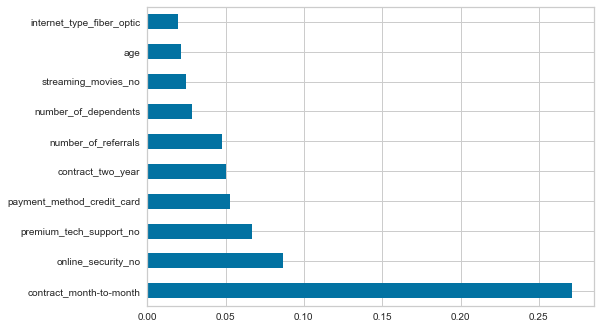

In [28]:
#after training a model you can use a built in feature importances to get this graph
feat_importances = pd.Series(model_xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [29]:
#print a report to show the accuracy of this model
#There is 85% accuracy for this model, which is pretty good!
def print_report(model,X_test,y_test,y_pred):
    """
    returns the model score, confusion matrix and classfication report
    """
    print("Model Score : {} \n ".format(model.score(X_test, y_test)))
    print("Confusion Matrix : \n {}\n".format(confusion_matrix(y_test,y_pred)))
    print("Accuracy : {}".format( round(accuracy_score(y_test, y_pred)*100, 2)))
    print("Classification report : \n\n"+classification_report(y_test, y_pred, labels=[0,1]))

y_pred = model_xgb.predict(X_test)

print_report(model_xgb,X_test,y_test,y_pred)
xgb = round(accuracy_score(y_test, y_pred)*100, 2)

Model Score : 0.8516678495386799 
 
Confusion Matrix : 
 [[950  96]
 [113 250]]

Accuracy : 85.17
Classification report : 

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1046
           1       0.72      0.69      0.71       363

    accuracy                           0.85      1409
   macro avg       0.81      0.80      0.80      1409
weighted avg       0.85      0.85      0.85      1409



### **For Visualization Purposes and Dashboard Building**

Now you can add the probability that each customer churns as a new column to a new csv file! You can even use it in PowerBI or Tableau to start making a cool dashboard. 

In [30]:
#read the original csv again and use the model against it, then export
telecom_predict = pd.read_csv('telecom_customer_churn.csv')
telecom_predict.fillna(0, inplace=True)
pred=model_xgb.predict_proba(X)[:,1]*100
telecom_predict['Predictions']=pred
telecom_predict.to_csv('telecom_customer_churn_proba.csv')

<a id='4'></a>  
## Section 2
## Telecom Customer Churn Data - Final Model and Deploy

Now we arrived at the best part!  Since we determined earlier the best options for cleaning the dataset and determining what features we wanted to keep we can build and deploy a model for Tableau.

Some things to keep in mind if you were to 'train' a model process inside Tableau, which we will show below:

* When the model is 'retrained' against new data, the prediction may change
* Constantly re-running the script will impact dashboard performance
* You also need to ensure the 'new_customer' data is the same number of columns and features that was trained against or you will run into Tableau Script errors

#### Step 1 - Building a PyCaret Model

This will train an XGBoost classification model and create a machine-learning model, then save it as a pickle file, which can later be used in your deployed function.

PyCaret is a much simpler utility for accomplishing this task as you can see below compared to the earlier described method. It may take a moment to process the results.

Also note we are creating a new csv file 'for_predictions' which you will open in Tableau. This simulates data that the model has not yet seen and it will then attempt to predict whether the customer churned or not. Ideally this would instead be a database you are connecting to Tableau that feeds in new customer information.

There should be 23 total columns in this example, however the customer_id will be ignored, however you can drop other featuers if you wish in the code below:

customer_id	
married	
number_of_dependents	
number_of_referrals	
tenure_in_months	
offer	
phone_service	
multiple_lines	
internet_service	
internet_type	
online_security	
online_backup	
device_protection_plan	
premium_tech_support	
streaming_tv	
streaming_movies	
streaming_music	
unlimited_data	
contract	
paperless_billing	
payment_method	
monthly_charge	
total_charges

In [3]:
#read data and clean it
dataset = pd.read_csv('telecom_customer_churn.csv')
dataset.columns = dataset.columns.str.lower().str.replace(' ', '_')
dataset.loc[dataset.customer_status=='Stayed','churn'] = 0
dataset.loc[dataset.customer_status=='Joined','churn'] = 0
dataset.loc[dataset.customer_status=='Churned','churn'] = 1
dataset['churn'] = dataset['churn'].astype('int')
dataset = dataset.replace(({'No': 0, 'Yes': 1}))
dataset['internet_type'].fillna("None", inplace = True)
dataset.fillna(0, inplace=True)
dataset = dataset.drop(['gender','age','city','zip_code','latitude','longitude',
                  'avg_monthly_long_distance_charges','avg_monthly_gb_download',
                  'total_refunds','total_extra_data_charges','total_long_distance_charges',
                  'total_revenue','customer_status','churn_category','churn_reason'], axis=1)

#unseen dataset for tableau
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)
for_predictions = data_unseen.drop(['churn'], axis=1)
for_predictions.to_csv('for_predictions.csv', index = False, header = True)

#environment
clf = setup(data, target = 'churn', session_id=562, ignore_features=['customer_id'], silent = True)

#create model
xgb = create_model('xgboost')

#finalize the model
xgb_final = finalize_model(xgb)

#save model
save_model(xgb_final, 'xgb_final_file')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8294,0.8959,0.6504,0.6838,0.6667,0.5521,0.5525
1,0.8188,0.8847,0.7154,0.6377,0.6743,0.5493,0.5511
2,0.8060,0.8792,0.5691,0.6481,0.6061,0.4781,0.4798
3,0.8568,0.9084,0.7317,0.7258,0.7287,0.6315,0.6315
4,0.8205,0.8634,0.6423,0.6639,0.6529,0.5319,0.5320
5,0.8440,0.8863,0.6992,0.7049,0.7020,0.5964,0.5964
6,0.8526,0.9098,0.6504,0.7547,0.6987,0.6018,0.6047
7,0.8184,0.8781,0.6179,0.6667,0.6414,0.5200,0.5207
8,0.8355,0.8949,0.6667,0.6949,0.6805,0.5698,0.5700


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['customer_id'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='churn',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,...
                                gamma=0, gpu_id=-1, grow_policy='depthwise',
                                importance_type=None, interaction_constraints='',
                                learning_rate=0.300000012, max_bin=256,
                                max_ca

#### Step 2 - Building a Deployable Function

This will make the process of deploying a function inside of Tableau much easier and considerably cut down on written code in Tableau Calculated Fields.

Here we are defining the connection which will connect to the TabPy client server you should have still running up to this point. This data will be passed through the server and apply the model to the 'new' customers table in Tableau. In the code below there are 22 argument values. A dataframe consists of the 22 column features from your 'for_predictions.csv' which must match exactly as below in the Dataframe.

**REMINDER: You WILL need to change the load_model path to your full folder path, for the purposes of this guide I have left out my full directory path**

In [7]:
#for tableau pycaret v4

connection = tabpy_client.Client('http://localhost:9004/')

def churn (_arg1,_arg2,_arg3,_arg4,_arg5,_arg6,_arg7,_arg8,_arg9,_arg10,_arg11,_arg12,_arg13,_arg14,
                   _arg15,_arg16,_arg17,_arg18,_arg19,_arg20,_arg21,_arg22): 
    
    import pandas as pd
    import pycaret.classification
    
    #REMINDER: Change to full folder path, i.e. (r'C:\User\folder\model_file_name')
    xgb = pycaret.classification.load_model(r'xgb_final_file')

       # X_pred = np.transpose(np.array([_arg1,_arg2,_arg3,_arg4,_arg5,_arg6,_arg7,_arg8,_arg9,_arg10,_arg11,_arg12,_arg13,
                                    #_arg14,_arg15,_arg16,_arg17,_arg18,_arg19,_arg20,_arg21]))
            
    X_pred = pd.DataFrame({'married':_arg1,'number_of_dependents':_arg2,
                           'number_of_referrals':_arg3,'tenure_in_months':_arg4,
                           'offer':_arg5, 'phone_service':_arg6,
                           'multiple_lines':_arg7,'internet_service':_arg8,
                           'internet_type':_arg9,'online_security':_arg10,
                           'online_backup':_arg11,'device_protection_plan':_arg12,
                           'premium_tech_support':_arg13,'streaming_tv':_arg14,
                           'streaming_movies':_arg15,'streaming_music':_arg16,
                           'unlimited_data':_arg17,'contract':_arg18,
                           'paperless_billing':_arg19,'payment_method':_arg20,
                           'monthly_charge':_arg21,'total_charges':_arg22})
    
    pred = pycaret.classification.predict_model(xgb, X_pred)
    
    return pred['Label'].tolist()

#note here, that you are 'calling' the function named above as 'churn', but saving it as 'ChurnPrediction'
#which will be used in a Tableau calculated field
connection.deploy('ChurnPrediction', churn, 
                  'Predicts whether a customer will churn or not', override = True)

<a id='5'></a> 
## Section 3
## Telecom Customer Churn Data - Loading Model into Tableau

Now we need to open Tableau and connect to the 'for_predictions.csv' we made during the PyCaret coding. 

Please follow the instructions below:

1. Open Tableau
2. Select '**To a File**' -> '**Text File**'

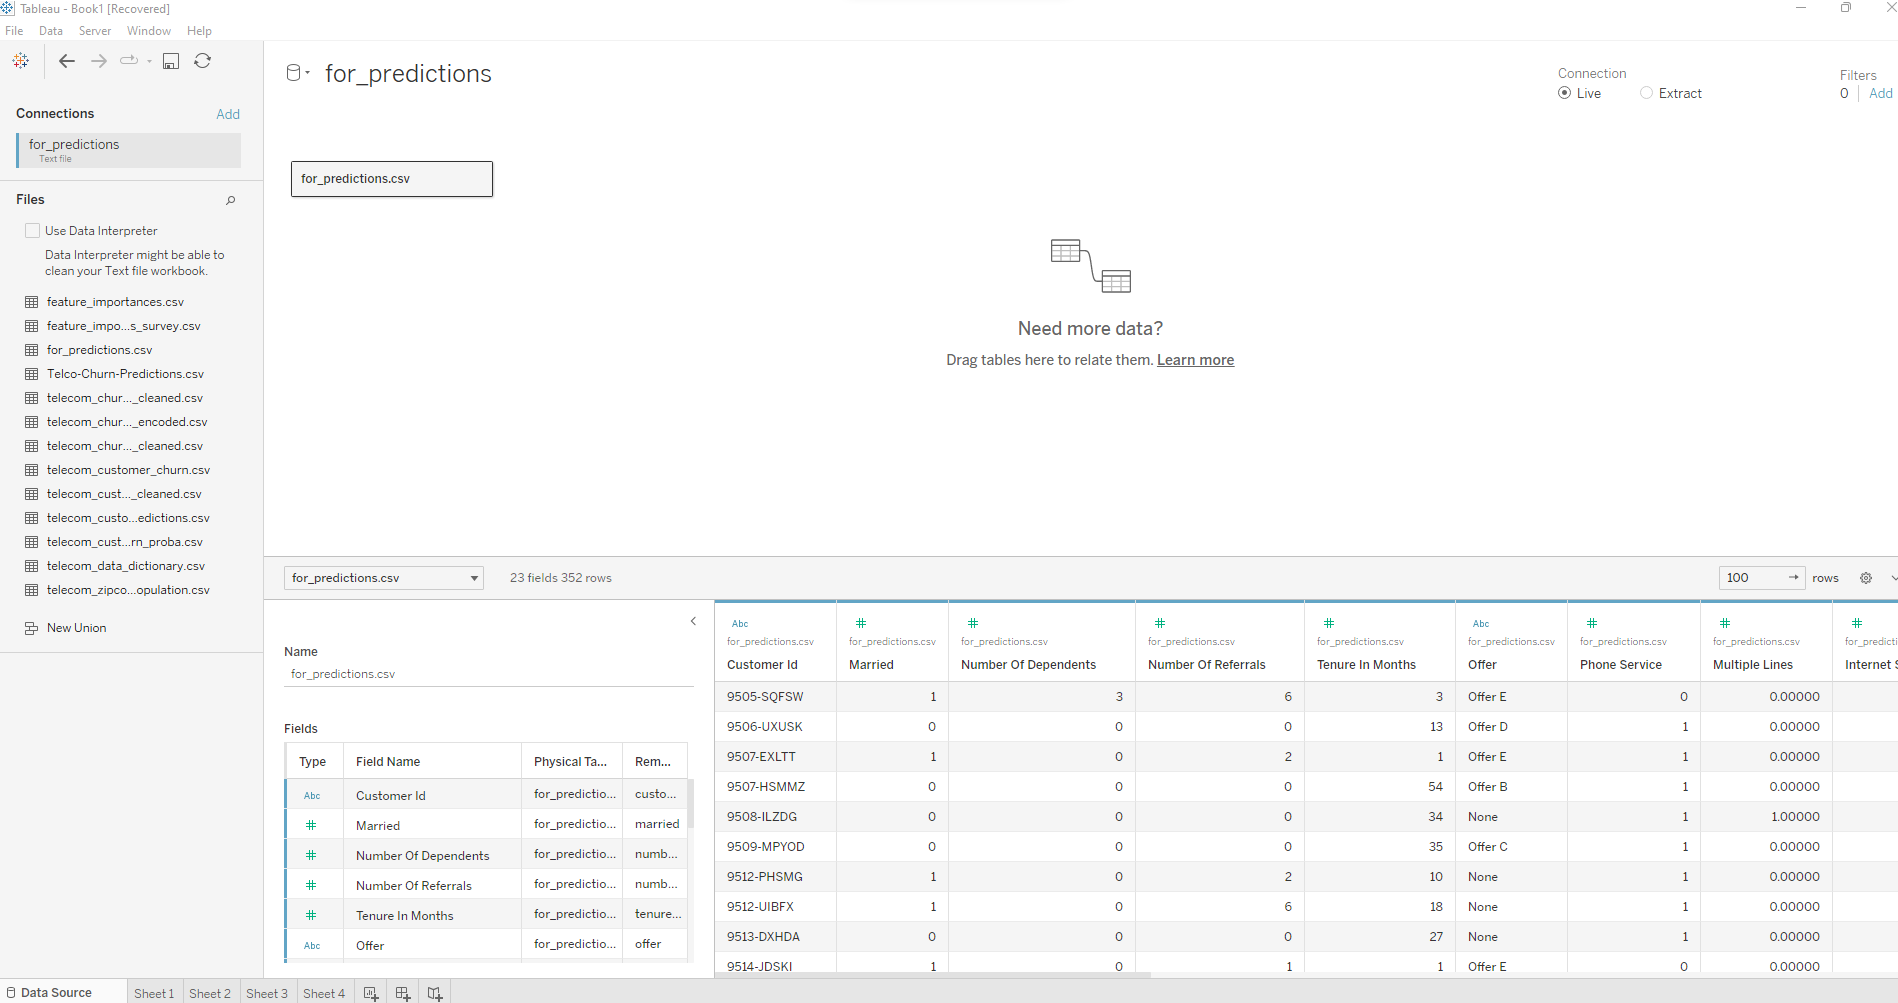

3. Click on the '**New Sheet**' button or use '**Ctrl+M**'
4. On the new sheet, go to '**Analysis**' -> '**Create Calculated Field**'
5. Name it '**Label**' to match the return value from earlier
6. Input the code below (for categorical columns use ATTR and Numerical SUM):


SCRIPT_REAL("

return tabpy.query('ChurnPrediction',_arg1,_arg2,_arg3,_arg4,_arg5,
_arg6,_arg7,_arg8,_arg9,_arg10,_arg11,_arg12,_arg13,_arg14,_arg15,
 _arg16,_arg17, _arg18, _arg19, _arg20,_arg21, _arg22)['response']

",


ATTR([Married]),SUM([Number Of Dependents]),SUM([Number Of Referrals]),
SUM([Tenure In Months]),ATTR([Offer]), ATTR([Phone Service]), 
ATTR([Multiple Lines]), ATTR([Internet Service]), ATTR([Internet Type]), 
ATTR([Online Security]), ATTR([Online Backup]), ATTR([Device Protection Plan]), 
ATTR([Premium Tech Support]),ATTR([Streaming Tv]),ATTR([Streaming Movies]),
ATTR([Streaming Music]), ATTR([Payment Method]), SUM([Monthly Charge]),
SUM([Total Charges])

)

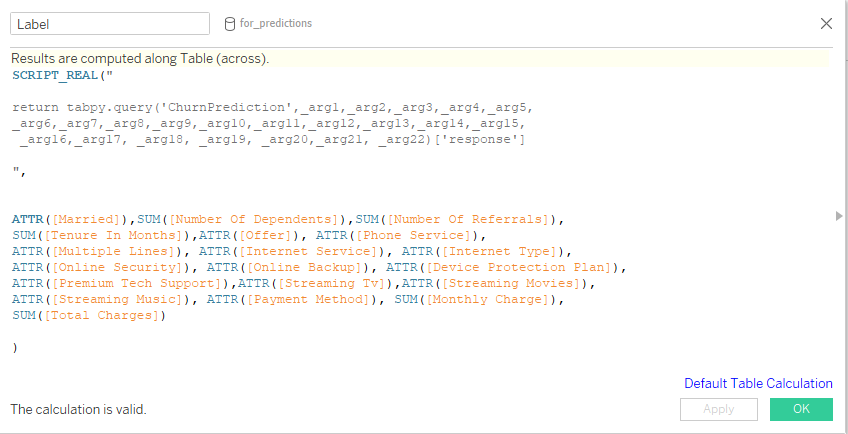

**Breakdown of what is Occurring by calling ChurnPrediction**

* The tableau script_real specifies the type of data that will be returned. In this use case, it is returning a predicted 'Label' against 'churn' users, it also intakes the same number of arguments as the Python deployed model (this is important, because it must match the same number of arguments)
* The script is running the deployed file 'ChurnPrediction' that runs our saved prediciton model pickle file, it runs through the Python function first with load_model and running the transformation
* X_pred dataframe is matched against the argument values in Python and Tableau
* predict_model runs and takes the trained XGB model against the new data input (our so called 'new' customers of 'for_predictions' which the model has not yet seen)
* It then returns the 'response' as a 'Label' in Tableau as 0's for No and 1's for Yes


**Depending on the type of data, you may not want to use SCRIPT_REAL.**

* SCRIPT_REAL: used when needed to return an output of type real from the given calculation (FLOAT).
* SCRIPT_INT: used when needed to return an output of type integer from the given calculation (INT).
* SCRIPT_STR: used when needed to return an output of type string from the given calculation (STR).
* SCRIPT_BOOL: used when needed to return an output of type boolean from the given calculation (BOOL).

### Creating your View

1. Drag the '**Customer ID**' and your desired columns onto the '**Rows**' shelf
2. For Aggregates change them to '**Discrete**' by right-clicking on them in the shelf
3. Drag the '**Label**' prediction script onto the '**Columns**' shelf
4. For the Label Prediction, change it to '**Discreate**' by right-clicking on it in the shelf
5. In the '**Marks**' dropdown, select '**Shape**'
5. Drag the '**Label**' prediction script again onto shapes
6. Drag the '**Label**' again onto the '**Color**' and '**Shape**' marks

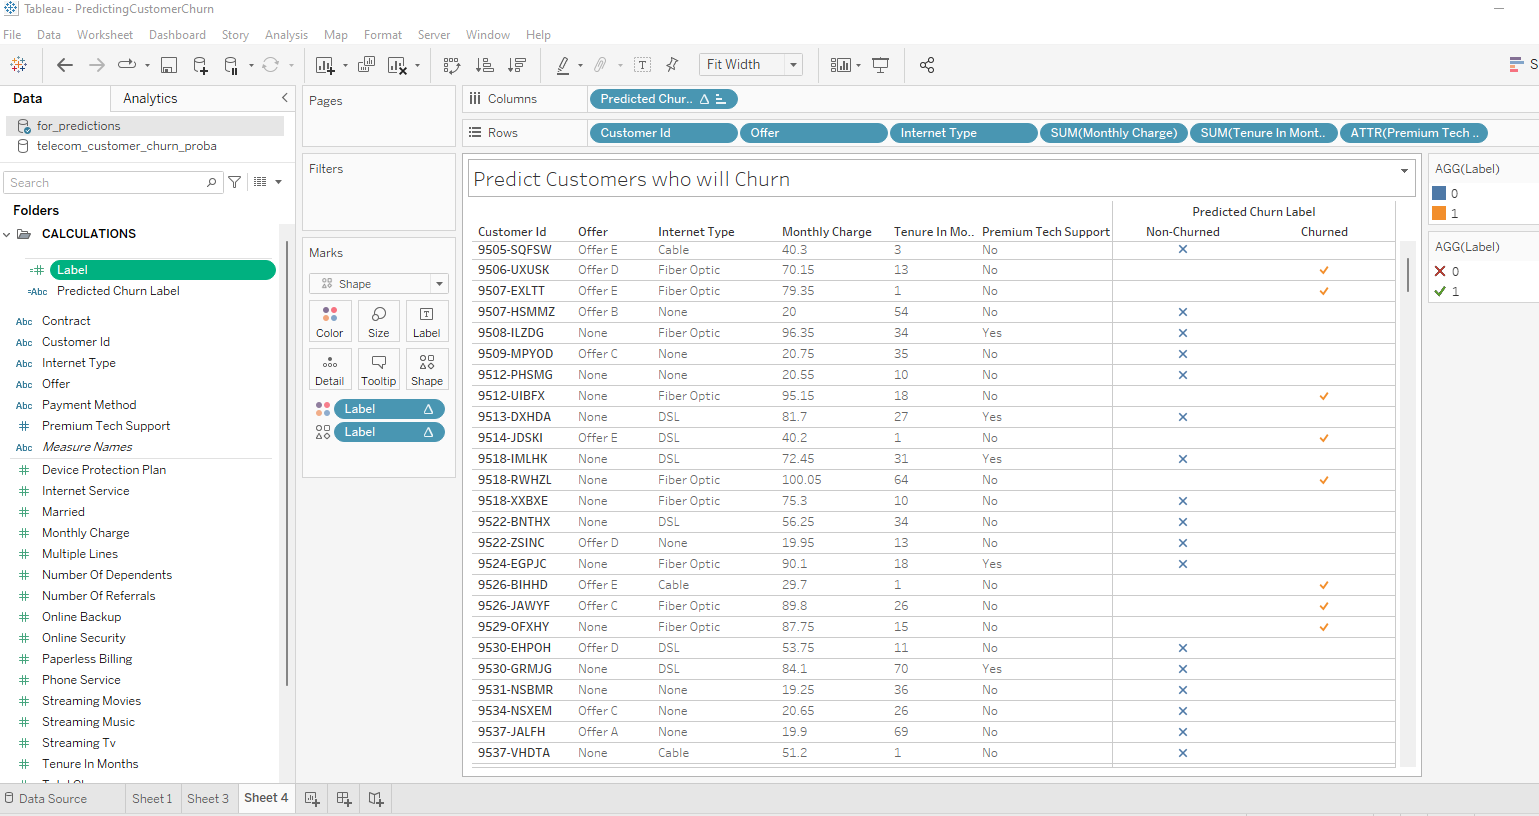

Additionally if you wish to modify the label and row label from (Label with 0 and 1), create the following Calculated Field below and drag the calculated field on the row label:

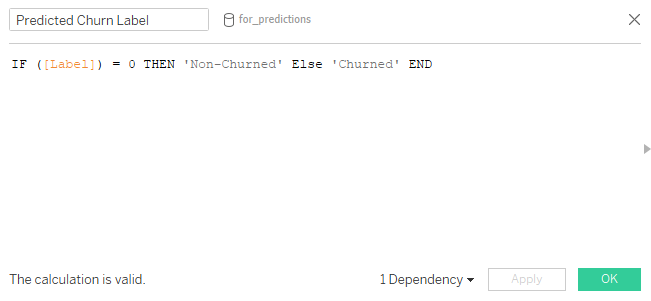

You could then additionally go to '**Worksheet**' -> '**Copy**' -> '**Data**' and start building a summary view like below where we could say month-to-month is significant for churn risk among the predicted user group:

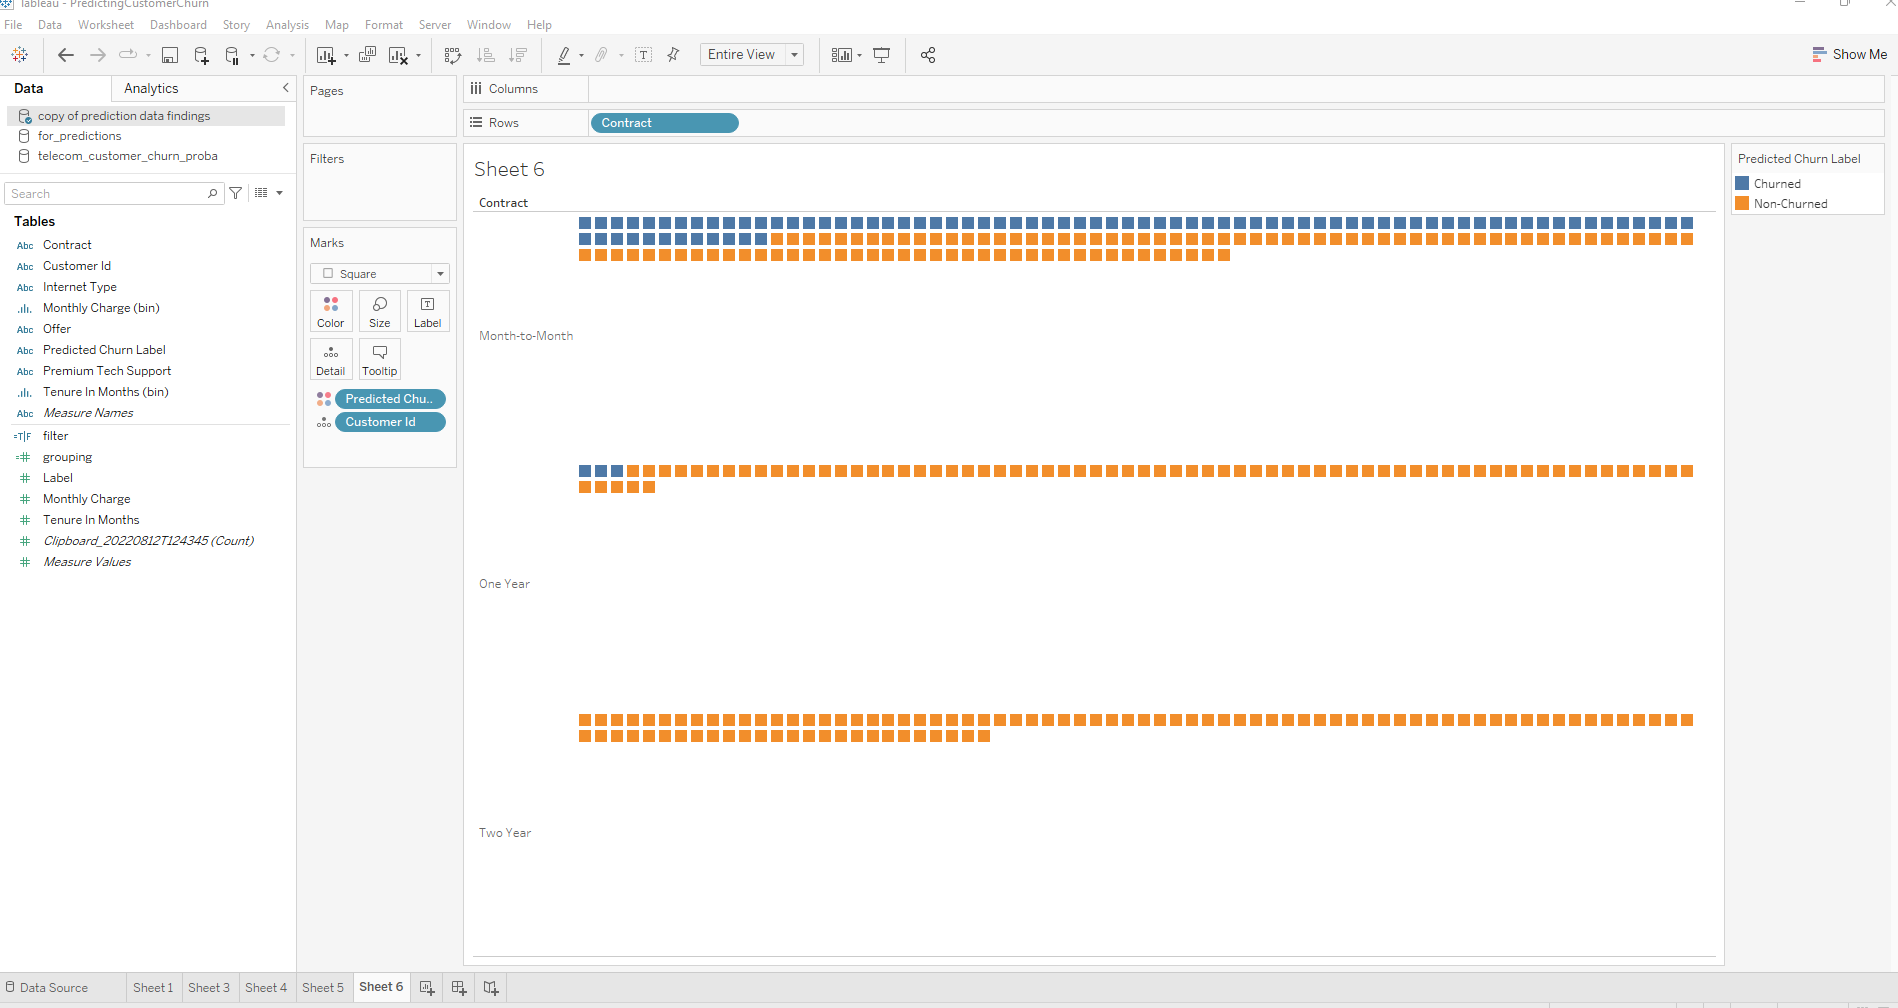

### Drawbacks

(As noted in PyCaret documentation)

* The script will only run when pulled into the view
* It cannot be used as a base for further calculations unless both are in the view
* The python generated data cannot be appended to Tableau extracts
* The script runs each time the view is changed which can lead to long wait times

The workaround is to instead use Tableau Prep

<a id='6'></a>  
## Section 4
## Telecom Customer Churn Data - Loading Model into Tableau Prep

As mentioned previously, the best way around the drawbacks is to simply load the model into Prep.

Please follow the instructions below:

1. Open Tableeau Prep Builder and click on '**Connect to Data**' -> In To A file '**Text file**'

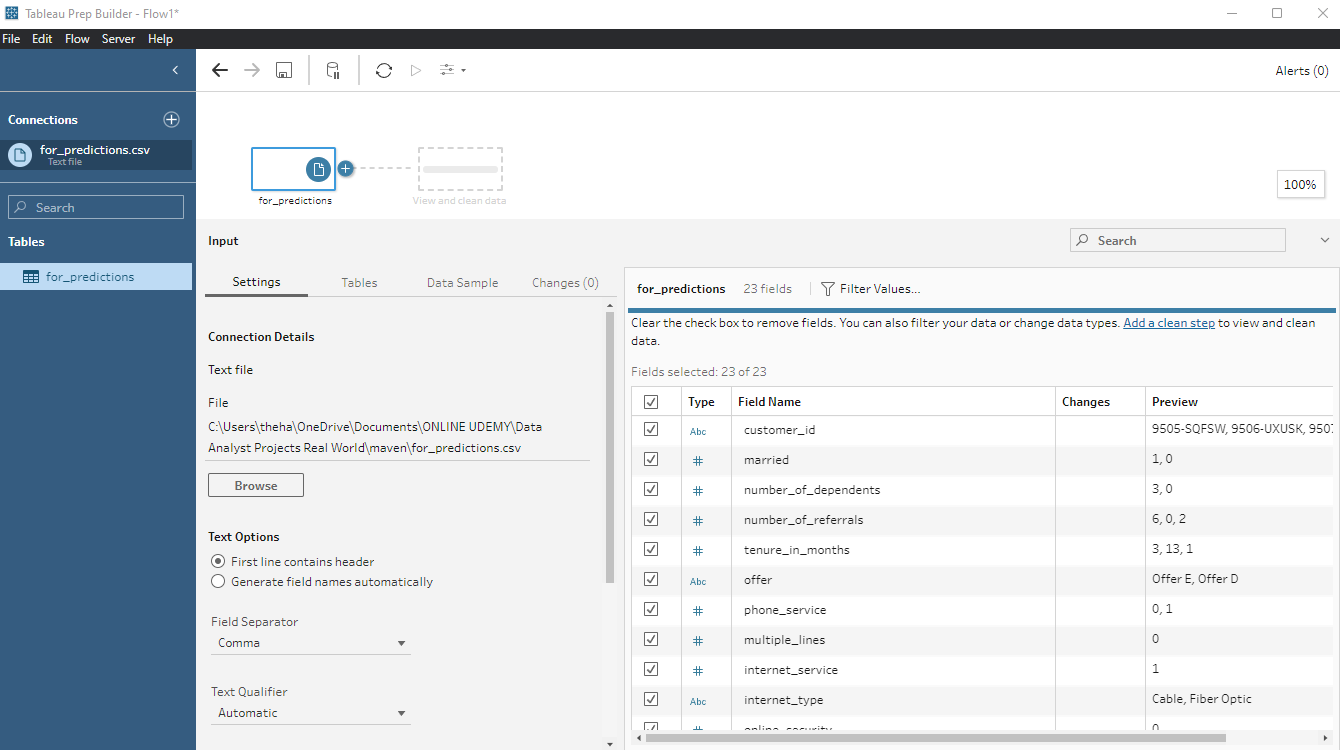

2. Click on the '**+**' button in the flow plane and click '**Script**'

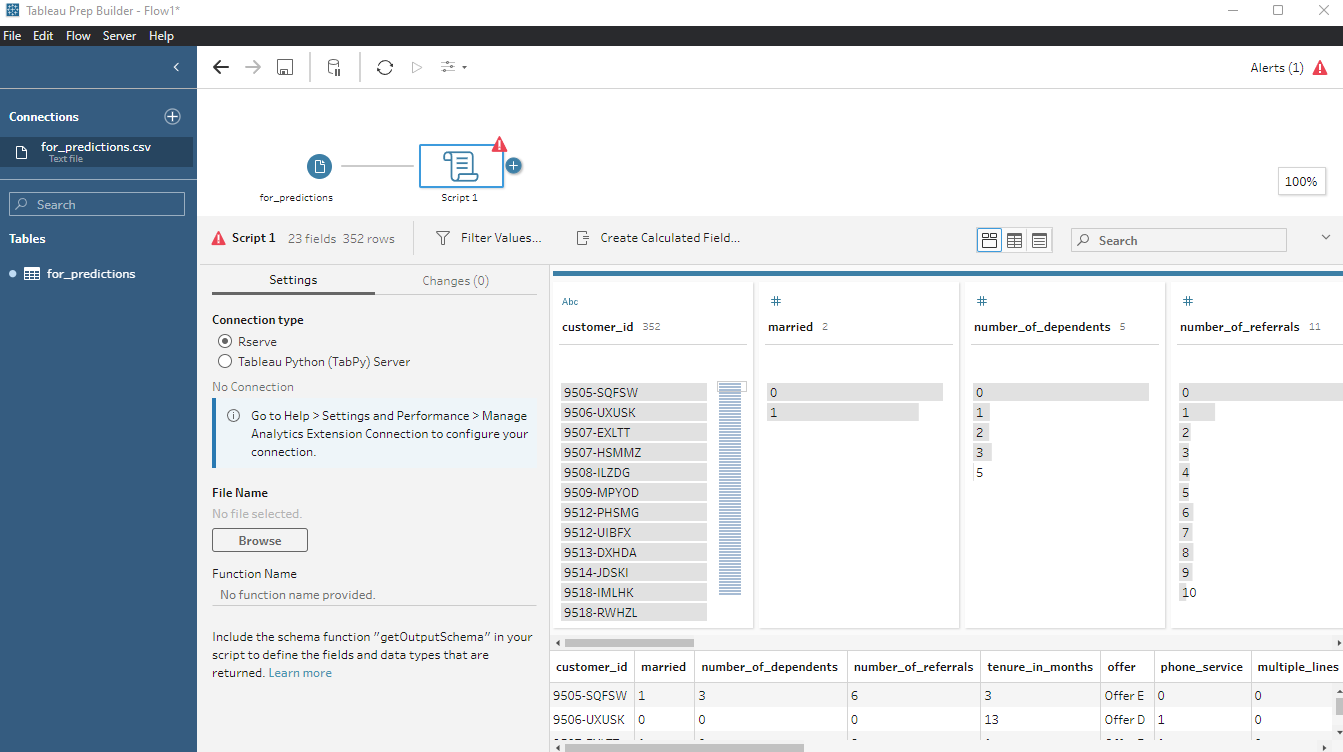

3. Connect to Localhost by going to '**Help**' -> '**Settings and Performance**' -> '**Manage Analytics Extension Connection**' and type in localhost and 9004 as before

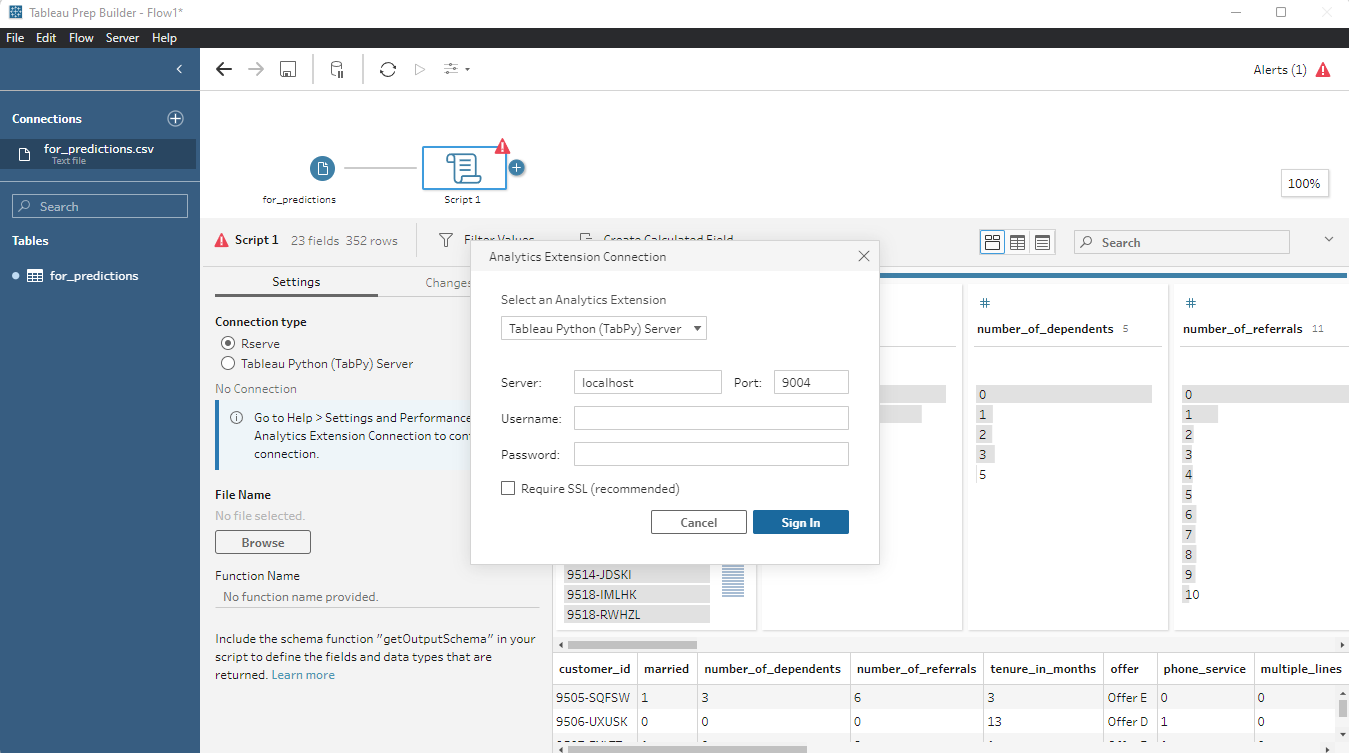

4. Create a new text file somewhere on your computer and paste in the following code, then change the extension to **.py**:

**Note again make sure the load_model is pointing to your full file path

def churn (df): 
    
    import pycaret.classification
    xgb = pycaret.classification.load_model(r'xgb_final_file')
    pred = pycaret.classification.predict_model(xgb, df)
    
    return pred

def get_output_schema():
	return pd.DataFrame({
	'customer_id' : prep_string(),
	'married' : prep_int(),
	'number_of_dependents' : prep_int(),
	'number_of_referrals' : prep_int(),
	'tenure_in_months' : prep_int(),
	'offer' : prep_string(),
	'phone_service' : prep_int(),
	'multiple_lines' : prep_int(),
	'internet_service' : prep_int(),
	'internet_type' : prep_string(),
	'online_security' : prep_int(),
	'online_backup' : prep_int(),
	'device_protection_plan' : prep_int(),
	'premium_tech_support' : prep_int(),
	'streaming_tv' : prep_int(),
	'streaming_movies' : prep_int(),
	'streaming_music' : prep_int(),
	'unlimited_data' : prep_int(),
	'contract' : prep_string(),
	'paperless_billing' : prep_int(),
	'payment_method' : prep_string(),
	'monthly_charge' : prep_decimal(),
	'total_charges' : prep_decimal(),
	'Label' : prep_decimal()
	});
    
   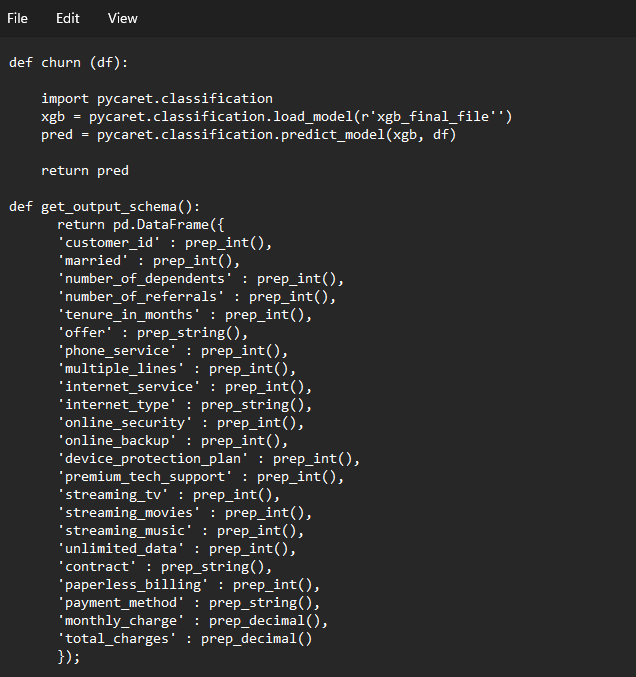
   
5. Like before when creating a deployed function, we are modifying it for use in Prep
6. Ensure the setting is selected for '**Tableau Python (TabPy) Server**' and click browse to navigate and locate the script file you created
7. Then make sure to put in the function name in the field as '**churn**'

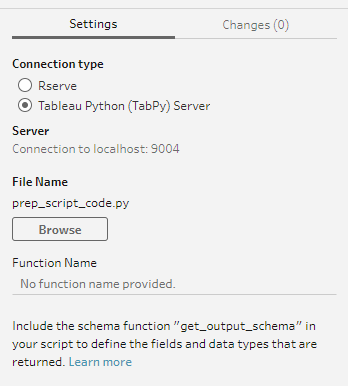

8. Click the '**+**' next to the script and select '**Output**'

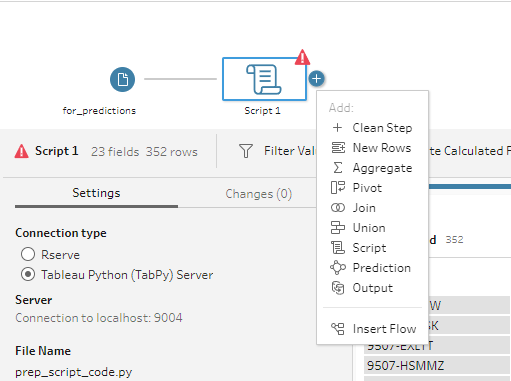

9. Next simply make sure you are outputting to CSV and click Run

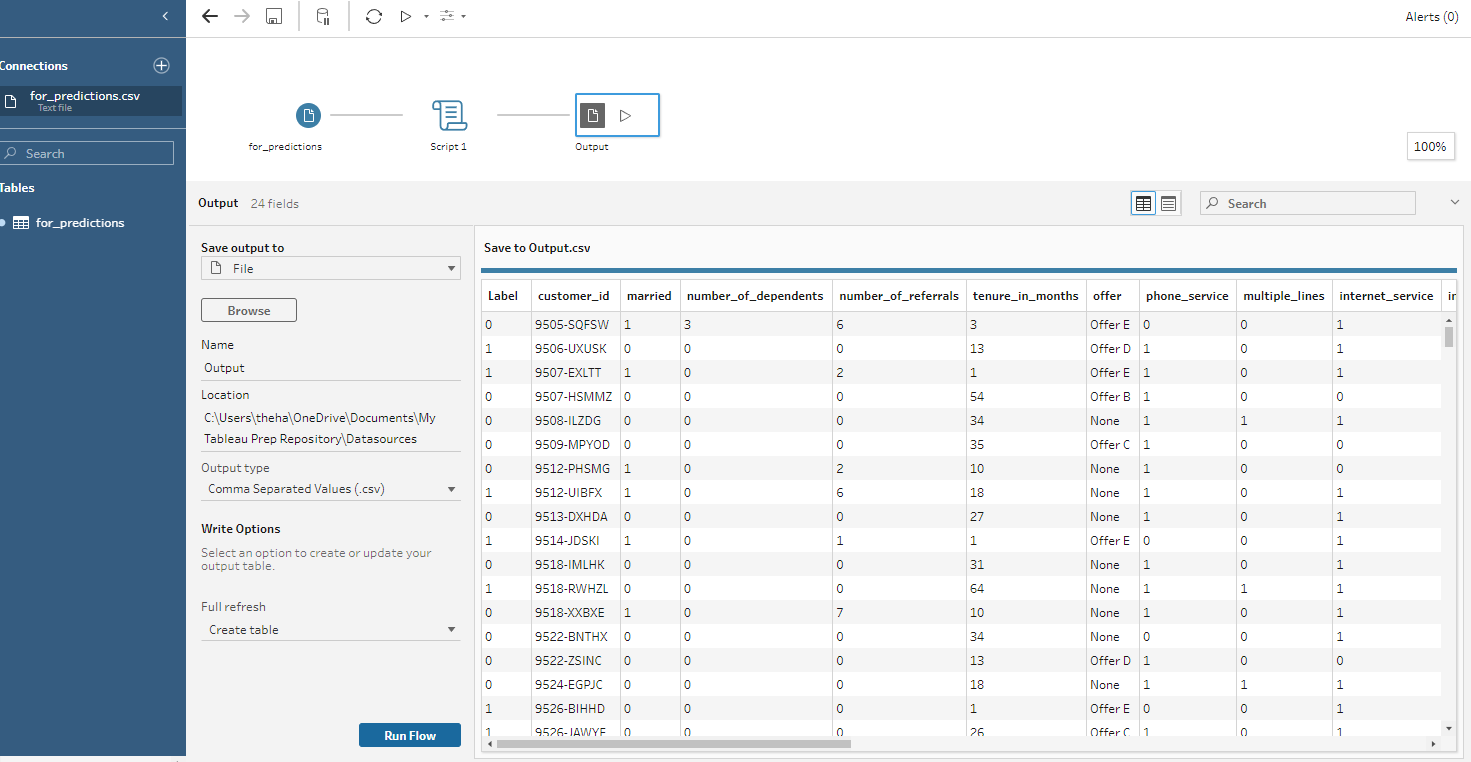

10. This will then create a brand new csv file that you can create a dashboard with in Tableau Desktop or Public!

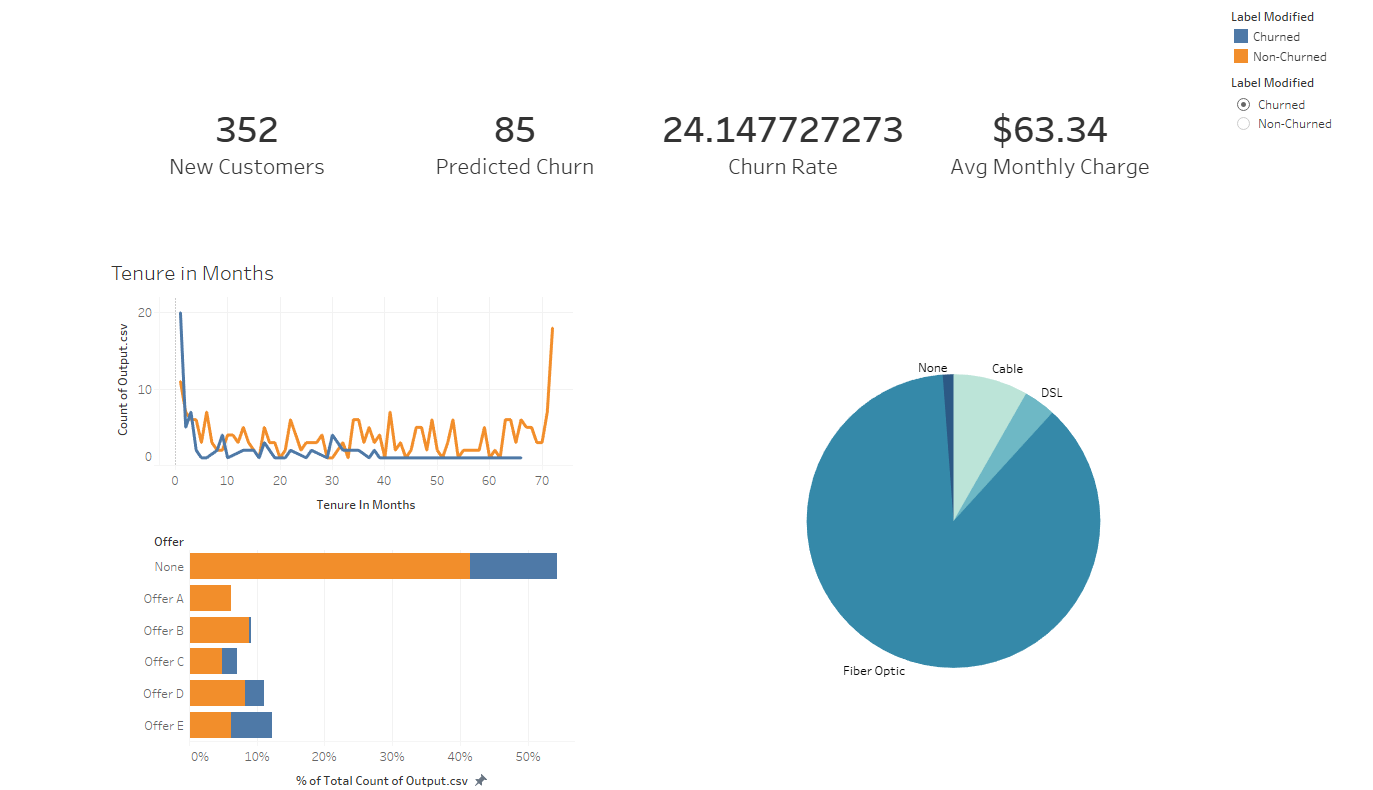